# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [43]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [44]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [45]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [46]:
clean_hospital_read_df.shape

(11578, 12)

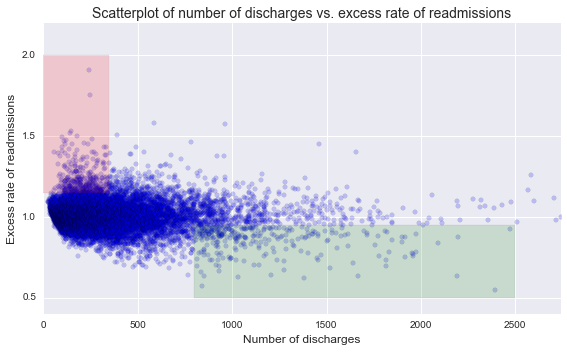

In [47]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [48]:
# Your turn

## A.) 

First of all, I do not agree with the recommendations from this analysis. They say the statistics for hospitals with less than 100 discharges and greater than 1000, but leave out all the hospitals from 100 to 1000. They then make a recommendation based on an arbitrary number of less than 300, which does not make any sense to me. They should also have fun the data many times to see how possible it is that the numbers they achieved were by coincidence. 

I am also unsure why they sliced the rows with [81:-3]. Perhaps this was to get rid of the NaN values in the excess Readmission Ratio column, but those can be removed in a more concise and understandable manner.

The placement of the red and green sections of the graph also confused me. It should be shaded completely above the 1.0 mark on the y-axis, and green all below. If the green extended the entire x-axis, then you would see that there are many more hospitals with less than 300 discharges that had a mean excess ratio of less than 1. 

## B.) 


1.) I am going to test whether or not small hospitals (hospitals with fewer than or equal to 300 discharges) have a higher mean excess rate than hospitals with greater than 300 discharges. I will do this by setting up the following hypotheses.

H_0: The mean excess rate of admission of hospitals with fewer than and including 300 discharges **is the same as** the mean excess rate of admission for hospitals with more than 300 discharges. In other words **there is no correlation between Excess Rate of Readmission and number of discharges**

H_a: The mean excess rate of admission of hospitals with fewer than and including 300 discharges **is greater than** the mean excess rate of admission for hospirals with more than 300 discharges. In other words **There is a negative correlation between excess rate of readmission and number of discharges**

2.) 

In [49]:
#cleaning the datatable by removing the NaN values from the Excess Readmission Ratio column
cleaner_hospital_read_df = clean_hospital_read_df.dropna(subset = ['Excess Readmission Ratio'])
cleaner_hospital_read_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [50]:
def pearson_r(data_1, data_2):
    r = np.corrcoef(data_1, data_2)[0, 1]
    return r

In [51]:
r_obs = pearson_r(cleaner_hospital_read_df['Excess Readmission Ratio'], cleaner_hospital_read_df['Number of Discharges'])
r_obs

-0.097397943510793505

In [60]:
#To see if there is a correlation between the two variables, I will permute one of the variables, but keep the other fixed,
#and find the correlation coefficent of the new data, and run many times
perm_data = np.empty(10000)
for i in range(10000):
    permuted_excess = np.random.permutation(cleaner_hospital_read_df['Excess Readmission Ratio'])
    perm_data[i] = pearson_r(permuted_excess, cleaner_hospital_read_df['Number of Discharges'])

p = np.sum(perm_data <= r_obs)/ len(perm_data) #since observed r is negative, I want to see how likely it is to be as negative
p

0

In [61]:
np.sum(perm_data <= r_obs)

0

Judging by the p value, which is so small that it appears to be 0, **we can conclude that the null hypothesis is false, and that there is a negative correlation between the two variables**

Now, I am going to check to see if there is a statistical difference between large and small hospitals by doing bootstrapping. For this I will need new Hypotheses.

H_0: There is no difference in the mean excess readmissions ratio between small (<=300 discharges) and large (>300 discharges) hospitals.

H_a: There is a difference in the mean excess readmissions ratio between small and large hospitals.

In [62]:
#Splitting the data frame into two different subsets for small and large hospitals.

In [63]:
small_hosps = cleaner_hospital_read_df[['Excess Readmission Ratio','Number of Discharges']].loc[cleaner_hospital_read_df['Number of Discharges'] <= 300]

In [64]:
large_hosps = cleaner_hospital_read_df[['Excess Readmission Ratio','Number of Discharges']].loc[cleaner_hospital_read_df['Number of Discharges'] > 300]

In [65]:
#They are split correctly
len(small_hosps) + len(large_hosps) == len(cleaner_hospital_read_df)

True

In [66]:
empirical_mean_diff = np.mean(small_hosps['Excess Readmission Ratio']) - np.mean(large_hosps['Excess Readmission Ratio'])
empirical_mean_diff

0.014479507404360992

In [67]:
data = np.concatenate((small_hosps['Excess Readmission Ratio'], large_hosps['Excess Readmission Ratio']))

def permutations(data_1, data_2):
    perms = np.random.choice(data, len(data))
    perm_small = perms[:len(data_1)]
    perm_large = perms[len(data_1):]
    return perm_small, perm_large

In [68]:
def bootstrap(data_1, data_2, size):
    boots = np.empty(size)
    for i in range(size):
        perm_small, perm_large = permutations(data_1, data_2)
        boots[i] = np.mean(perm_small) - np.mean(perm_large)
    return boots
    

In [69]:
theo_mean_diffs = bootstrap(small_hosps['Excess Readmission Ratio'], large_hosps['Excess Readmission Ratio'], 10000)
p = np.sum(theo_mean_diffs >= empirical_mean_diff)/ len(theo_mean_diffs)
p

0

In [70]:
np.sum(theo_mean_diffs >= empirical_mean_diff)

0

3.)During my analysis, I ran two tests. In one of them, I shuffled the data in one column and paired it with the unshuffled data in the other, and found the Pearson Correlation Coefficient 100,000 times. In none of them was I able to achieve the same negative Pearson Correlation coefficient that I did in the actual data.

In my other test, I separated the rows into two differenct groups. One with less than 300 discharges, and one with more. I found the difference in the means of the two groups and recorded it. I then shuffled the data and sliced 2 groups that reflected the sizes of the original 2 groups and found the difference between the means of the two groups. In none of them was I able to achieve as large of a difference of means as I did in the actual data.

Because of the results of these 2 analytical processes, I have concluded, at the $\alpha$ = 0.01 level, that there is both a negative correlation between *Excess Readmissions Ratio* and *Number of Discharges* and that the mean *Excess Readmissions Ratio* in smaller hospitals with less than 300 discharges is higher than the *Excess Readmissions Ratio* in larger hospitals.

4.) As I yielded such a low p-value, then it was practically impossible for me to get the same results that the actual data yielded. So this indicates that there **is** a correlation, meaning that as the hospital gets bigger, then the excess readmission ratio will decrease. Though this was deemed true, **I do not believe that this is practically significant**. The pearson correlation coefficient was very close to 0, at -0.097. Although I could not recreate this with my permutations, it is still such a low correlation that smaller hospitals should not be forced to change their operating ways. Looking at the graph they used, there are hundreds of hospitals in the >500 zone that have sub-1 ratios, and they should not be thrown into a group that will have to spend money because of that. 

I would change the recommendation and remove the part about forcing hospitals with >300 discharges to implement new machinery, etc. I also don't believe that the hospitals should consolidate and become bigger hospitals with more discharges. Though there is correlation between the two variables, I don't believe that there is causation between them as well. 

Instead, my recommendation would be to give incentives to *any* hospital that can lower it's readmission rate from between 1.5 and 1 to under 1, and I would enforce any hospital with greater than a rate of 1.5 to demonstrate an upgraded resource allocation before they can operate again. Then after they get it down below 1.5, they may be offered incentives. Looking at the scatter plot they used, there are not too many about 1.5, so it won't be hard to enforce. 

5.) 
**Pros**: 
    - You can see where the lowest and highest points along the y-axis are with ease.
    - You can see where the majority of the points lie.
    - It is easy to see which points are above a certain threshold. 
**Cons**:
    - It is hard to gauge how many points there are above and below a certain line
    - The amount of points get muddied around the bottom left, which reduced the impact of seeing that there are penty of hospitals with fewer than 300 discharges without a rate of >1.0. 
    - It is difficult to see any actual correlation
    

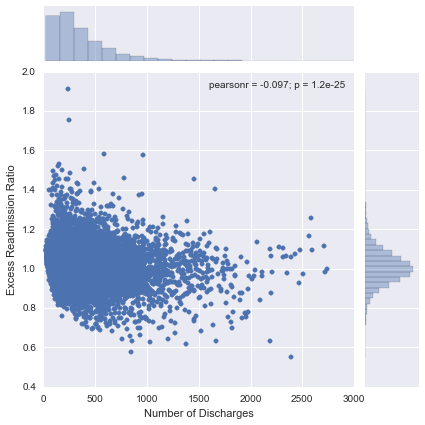

In [102]:
_ = sns.jointplot(cleaner_hospital_read_df['Number of Discharges'],cleaner_hospital_read_df['Excess Readmission Ratio'], xlim = [0,3000])


This plot shows that the excess readmission rate is approximately normal, and it also includes the pearson correlation coefficient and the p value, which is really convenient.